In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_excel("strokes.xlsx")
df.head()

,male,age,education,smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.drop(['education','male'], inplace = True, axis = 1)
df.rename(columns ={'TenYearCHD':'strokes'}, inplace = True)
df.head()

,age,smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,strokes
0,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


dropping null values


In [ ]:
df.dropna(axis = 0, inplace = True)

In [ ]:
print(df.head(),df.shape)

   age  smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0   39        0         0.0     0.0                0             0         0   
1   46        0         0.0     0.0                0             0         0   
2   48        1        20.0     0.0                0             0         0   
3   61        1        30.0     0.0                0             1         0   
4   46        1        23.0     0.0                0             0         0   

   totChol  sysBP  diaBP    BMI  heartRate  glucose  strokes  
0    195.0  106.0   70.0  26.97       80.0     77.0        0  
1    250.0  121.0   81.0  28.73       95.0     76.0        0  
2    245.0  127.5   80.0  25.34       75.0     70.0        0  
3    225.0  150.0   95.0  28.58       65.0    103.0        1  
4    285.0  130.0   84.0  23.10       85.0     85.0        0   (3751, 14)


In [ ]:
df.strokes.value_counts()

strokes
0    3179
1     572
Name: count, dtype: int64

In [ ]:
df.head()

,age,smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,strokes
0,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
X = np.asarray(df[['age', 'cigsPerDay',
                           'totChol', 'sysBP', 'diaBP', 'glucose']])
y = np.asarray(df['strokes'])

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [ ]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


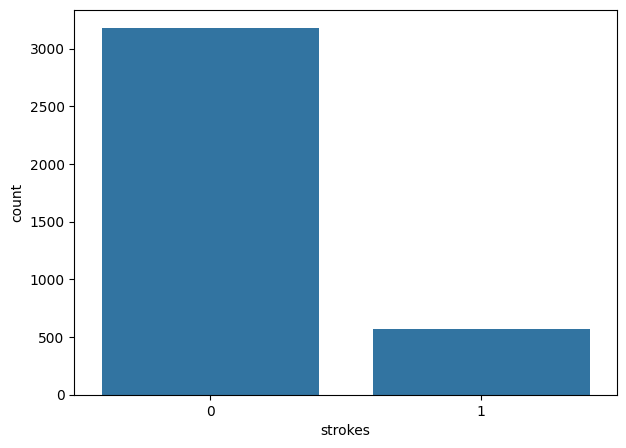

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(x='strokes', data=df)
plt.show()

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
print('Accuracy of the model is =',
      accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8516873889875666
